# Analiza mocy testu

1. Stwórz krzywą mocy testu dla testu jednej średniej.
2. Określ kluczowe parametry wejściowe, takie jak odchylenie standardowe populacji (σ), poziom istotności (α) oraz wielkość efektu (Δ).

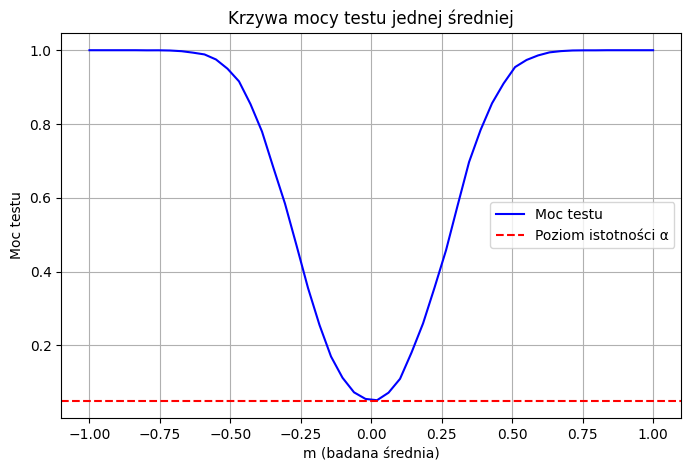

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry
alpha = 0.05  # Poziom istotności
sigma = 1  # Odchylenie standardowe
n = 50  # Wielkość próby
mu_0 = 0  # Średnia w H0
k = 10000  # Liczba symulacji

# Wartości m dla testu
m_values = np.linspace(-1, 1, 50)

# Krytyczna wartość Z dla testu dwustronnego
z_critical = norm.ppf(1 - alpha / 2)
critical_value = z_critical * (sigma / np.sqrt(n))

# Obliczanie mocy testu
power = []
for mu in m_values:
    # Próbki (k próbek o n obserwacjach)
    samples = np.random.normal(mu, sigma, (k, n))
    sample_means = np.mean(samples, axis=1)
    
    # Obliczamy statystykę testową Z
    z_scores = (sample_means - mu_0) / (sigma / np.sqrt(n))
    
    # Sprawdzamy odrzucenie H0 (dwustronne)
    rejections = (np.abs(z_scores) > z_critical)
    power.append(np.mean(rejections))

plt.figure(figsize=(8, 5))
plt.plot(m_values, power, label="Moc testu", color="b")
plt.axhline(y=alpha, color="r", linestyle="--", label="Poziom istotności α")
plt.xlabel("m (badana średnia)")
plt.ylabel("Moc testu")
plt.title("Krzywa mocy testu jednej średniej")
plt.legend()
plt.grid()
plt.show()


# Wpływ poziomu istotności (α)

1. Przeanalizuj, jak zmienia się krzywa mocy testu dla różnych wartości α (np. 0.01, 0.05, 0.1).

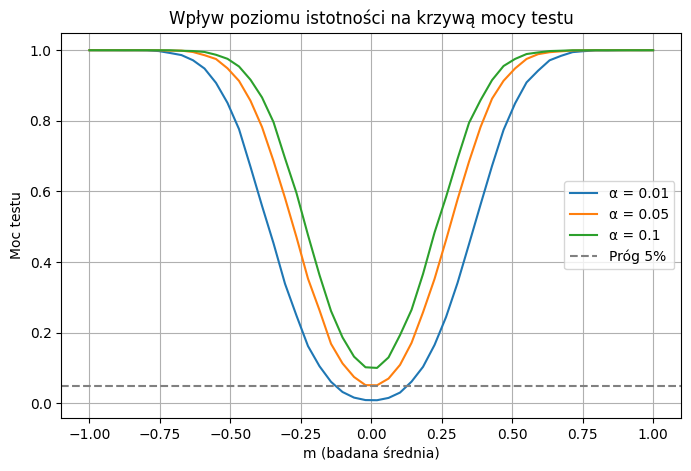

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry
sigma = 1  # Odchylenie standardowe
n = 50  # Wielkość próby
mu_0 = 0  # Średnia w hipotezie zerowej
k = 10000  # Liczba iteracji
alpha_values = [0.01, 0.05, 0.1]  # Różne poziomy istotności
m_values = np.linspace(-1, 1, 50)  # Zakres badanej średniej

# Obliczanie mocy testu dla różnych wartości alfa
plt.figure(figsize=(8, 5))

for alpha in alpha_values:
    z_critical = norm.ppf(1 - alpha / 2)  # Krytyczna wartość Z dla testu dwustronnego
    critical_value = z_critical * (sigma / np.sqrt(n))  # Granica odrzucenia H0
    
    power = []
    for mu in m_values:
        samples = np.random.normal(mu, sigma, (k, n))  # Generowanie próbek
        sample_means = np.mean(samples, axis=1)
        
        z_scores = (sample_means - mu_0) / (sigma / np.sqrt(n))  # Obliczanie statystyki Z
        rejections = (np.abs(z_scores) > z_critical)  # Odrzucenie H0
        power.append(np.mean(rejections))
    
    plt.plot(m_values, power, label=f"α = {alpha}")

plt.axhline(y=0.05, color="gray", linestyle="--", label="Próg 5%")
plt.xlabel("m (badana średnia)")
plt.ylabel("Moc testu")
plt.title("Wpływ poziomu istotności na krzywą mocy testu")
plt.legend()
plt.grid()
plt.show()


2. Zinterpretuj wyniki – jak poziom istotności wpływa na zdolność testu do wykrycia rzeczywistego efektu?

**Interpretacja wyników**

Niższe 𝛼 (np. 0.01)
Gdy krzywa mocy jest niższa to test trudniej wykrywa rzeczywisty efekt.
Test jest bardziej rygorystyczny, co zmniejsza liczbę błędów I rodzaju (fałszywych odrzuceń 𝐻0), ale zwiększa błędy II rodzaju (nie wykrywanie prawdziwego efektu).

Wyższe 𝛼 (np. 0.1)
Krzywa mocy jest wyższa – test łatwiej odrzuca 𝐻0, co oznacza większą zdolność do wykrycia rzeczywistego efektu. Jednak zwiększa się ryzyko błędu I rodzaju, czyli częściej odrzucamy 𝐻0, nawet jeśli jest prawdziwa.

# Wpływ liczebności próby (n)

1. Zmodyfikuj analizę, badając różne wielkości próby.

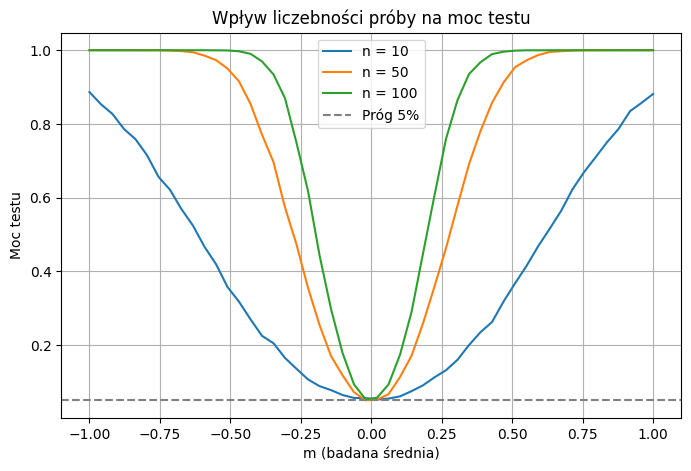

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry
alpha = 0.05  # Poziom istotności
sigma = 1  # Odchylenie standardowe
mu_0 = 0  # Średnia w hipotezie zerowej
k = 10000  # Liczba iteracji
n_values = [10, 50, 100]  # Różne wielkości próby
m_values = np.linspace(-1, 1, 50)  # Zakres badanej średniej

# Wykres
plt.figure(figsize=(8, 5))

for n in n_values:
    z_critical = norm.ppf(1 - alpha / 2)  # Krytyczna wartość Z dla testu dwustronnego
    critical_value = z_critical * (sigma / np.sqrt(n))  # Granica odrzucenia H0
    
    power = []
    for mu in m_values:
        samples = np.random.normal(mu, sigma, (k, n))  # Generowanie próbek
        sample_means = np.mean(samples, axis=1)
        
        z_scores = (sample_means - mu_0) / (sigma / np.sqrt(n))  # Obliczanie statystyki Z
        rejections = (np.abs(z_scores) > z_critical)  # Odrzucenie H0
        power.append(np.mean(rejections))
    
    plt.plot(m_values, power, label=f"n = {n}")

plt.axhline(y=alpha, color="gray", linestyle="--", label="Próg 5%")
plt.xlabel("m (badana średnia)")
plt.ylabel("Moc testu")
plt.title("Wpływ liczebności próby na moc testu")
plt.legend()
plt.grid()
plt.show()


2. Zbadaj, jak wzrost lub spadek n wpływa na moc testu.

**Interpretacja wyników**

Małe 𝑛 (np. 10)
Krzywa mocy rośnie powoli. Potrzeba większych efektów (𝑚) do wykrycia różnicy.

Średnie 𝑛 (np. 50)
Test wykrywa efekty szybciej, moc rośnie wcześniej.

Duże 𝑛 (np. 100)
Nawet małe efekty powodują dużą moc testu.
Krzywa szybko osiąga 1 (100% mocy), co oznacza, że test prawie zawsze wykrywa różnicę.

# Niespełnienie założeń testu

1. Przeanalizuj przypadek, gdy normalność rozkładu nie jest spełniona (np. dla rozkładów skośnych).

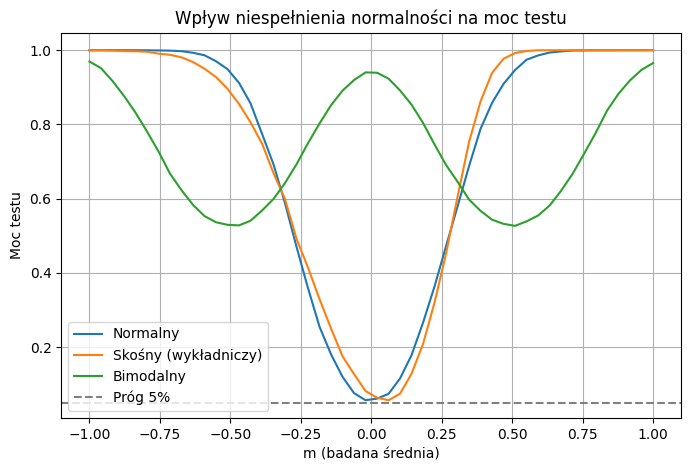

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

# Parametry
alpha = 0.05  # Poziom istotności
mu_0 = 0  # Średnia w hipotezie zerowej
k = 10000  # Liczba iteracji
n = 50  # Wielkość próby
m_values = np.linspace(-1, 1, 50)  # Zakres badanej średniej

# Definiowanie funkcji pomocniczych do generowania rozkładów
def normal_samples(mu, sigma, size, k):
    return np.random.normal(mu, sigma, (k, size))

def skewed_samples(mu, size, k):
    return np.random.exponential(scale=1, size=(k, size)) - 1 + mu  # Rozkład wykładniczy przesunięty

def bimodal_samples(mu, sigma, size, k):
    samples1 = np.random.normal(mu - 0.5, sigma, (k // 2, size))
    samples2 = np.random.normal(mu + 0.5, sigma, (k // 2, size))
    return np.vstack((samples1, samples2))

# Testowanie różnych rozkładów
distributions = {
    "Normalny": lambda mu: normal_samples(mu, 1, n, k),
    "Skośny (wykładniczy)": lambda mu: skewed_samples(mu, n, k),
    "Bimodalny": lambda mu: bimodal_samples(mu, 1, n, k)
}

# Wykres
plt.figure(figsize=(8, 5))

for label, sample_func in distributions.items():
    power = []
    z_critical = norm.ppf(1 - alpha / 2)  # Krytyczna wartość Z
    
    for mu in m_values:
        samples = sample_func(mu)  # Macierz k × n
        sample_means = np.mean(samples, axis=1)  # Średnie z każdej próbki
        
        # Obliczanie odchylenia empirycznego zamiast stałego
        sample_std = np.std(samples, axis=1, ddof=1)
        se = sample_std / np.sqrt(n)  # Błąd standardowy
        
        z_scores = (sample_means - mu_0) / se  # Statystyka testowa
        rejections = (np.abs(z_scores) > z_critical)  # Odrzucenie H0
        power.append(np.mean(rejections))
    
    # Rysowanie wykresu dla każdego rozkładu
    plt.plot(m_values, power, label=label)

plt.axhline(y=alpha, color="gray", linestyle="--", label="Próg 5%")
plt.xlabel("m (badana średnia)")
plt.ylabel("Moc testu")
plt.title("Wpływ niespełnienia normalności na moc testu")
plt.legend()
plt.grid()
plt.show()


2. Porównaj wyniki testu dla próbek pobranych z różnych rozkładów (np. normalnego, skośnego, bimodalnego).

**Interpretacja wyników wykresu**

`Rozkład normalny`
Moc testu rośnie symetrycznie wraz ze wzrostem wartości ∣𝑚∣. Wartości mocy są najwyższe dla danej wielkości próby 𝑛.

`Rozkład skośny (wykładniczy)`
Ponieważ rozkład jest asymetryczny, test może częściej popełniać błędy w jedną stronę. Moc testu może być niższa niż dla normalnego rozkładu przy tej samej wartości 𝑚, zwłaszcza dla wartości bliskich zeru.
Dla ujemnych 𝑚, moc testu może być znacznie mniejsza niż dla dodatnich wartości.

`Rozkład bimodalny`
Test ma większe trudności z wykrywaniem różnic, a moc testu może być niższa niż dla rozkładu normalnego. Czasami rośnie wolniej, bo większa zmienność utrudnia ocenę średniej. Można też odrazu zauważyć iż mamy dwa ekstrema minimum.

# Wizualizacja zależności

1. Przedstaw wpływ różnych czynników na moc testu na jednym wykresie lub zestawie wykresów.
2.  Uwzględnij co najmniej trzy spośród następujących czynników:
	- poziom istotności (α)
	- liczebność próby (n)
	- wielkość efektu (Δ)
	- rodzaj rozkładu populacji
3. Zaproponuj sposób oznaczenia różnych wartości poszczególnych czynników (np. kolory, style linii, osie).


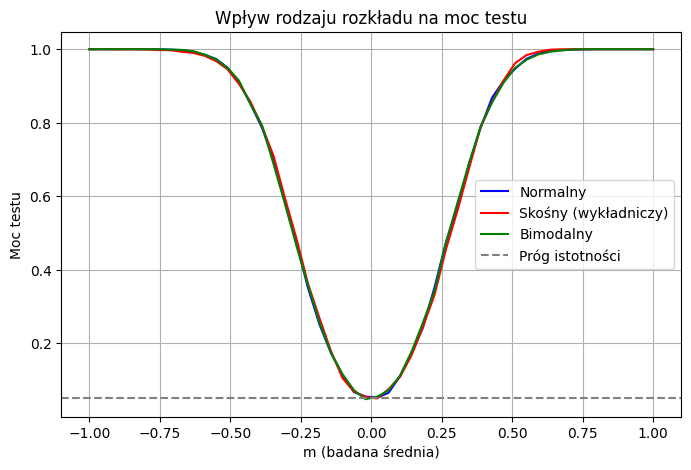

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry
alpha_values = [0.01, 0.05, 0.1]  # Poziomy istotności
sigma = 1  # Odchylenie standardowe
mu_0 = 0  # Średnia w hipotezie zerowej
k = 5000  # Liczba iteracji Monte Carlo (mniejsza dla szybszego działania)
n = 50  # Stała liczebność próby
m_values = np.linspace(-1, 1, 50)  # Zakres badanej średniej

# Definiowanie funkcji generujących próbki
def normal_samples(mu, size):
    return np.random.normal(mu, sigma, size)

def skewed_samples(mu, size):
    return np.random.exponential(scale=1, size=size) - 1 + mu  # Skośny (wykładniczy)

def bimodal_samples(mu, size):
    samples1 = np.random.normal(mu - 0.5, sigma, size // 2)
    samples2 = np.random.normal(mu + 0.5, sigma, size // 2)
    return np.concatenate([samples1, samples2])

# Lista rozkładów
distributions = {
    "Normalny": normal_samples,
    "Skośny (wykładniczy)": skewed_samples,
    "Bimodalny": bimodal_samples
}

# Kolory dla różnych rozkładów
colors = {"Normalny": "blue", "Skośny (wykładniczy)": "red", "Bimodalny": "green"}

plt.figure(figsize=(8, 5))
z_critical = norm.ppf(1 - 0.05 / 2)  # Krytyczna wartość Z dla alpha = 0.05

for label, sample_func in distributions.items():
    power = []
    for mu in m_values:
        samples = np.array([sample_func(mu, n) for _ in range(k)])  # Generowanie próbek
        sample_means = np.mean(samples, axis=1)
        
        z_scores = (sample_means - mu_0) / (sigma / np.sqrt(n))  # Statystyka testowa
        rejections = (np.abs(z_scores) > z_critical)  # Odrzucenie H0
        power.append(np.mean(rejections))
    
    plt.plot(m_values, power, label=label, color=colors[label])

plt.axhline(y=0.05, color="gray", linestyle="--", label="Próg istotności")
plt.xlabel("m (badana średnia)")
plt.ylabel("Moc testu")
plt.title("Wpływ rodzaju rozkładu na moc testu")
plt.legend()
plt.grid()
plt.show()
